In [4]:
%load_ext autoreload
%autoreload 2
from kg import build_nx_graph
import sparql
from connection import sparql_request, wsd_request
from evaluation import WordSimEvaluation
from visualize import get_graphic_G, color_map
from analytics import DiGraph, DAC, make_DAC
from preprocessing import get_ideas_in_format
from similarity import ConceptSimilarity
from wmd import WordMoversSimilarity
import numpy as np
import networkx as nx
from dataset import Dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [316]:
c, cc, texts = get_ideas_in_format(dataset="gold", database="wikidata")
bows = [[c["id"] for c in bow] for bow in cc]

In [5]:
ds = Dataset()

In [39]:
ds_name="noun_ws353-sim"
conc = ds.transform_dataset(ds_name)

In [40]:
dac_g = DAC(concepts=conc[0], dataset=ds_name, relatedness=True)
di_g = DiGraph(concepts=conc[0], dataset=ds_name, relatedness=True)

In [44]:
di_g.write_to_file()

 Worte to file: data/wikidata/DiGraph_rel_noun_ws353-sim.gml


'done'

In [41]:
[n for n in di_g.graph.nodes(data=True) if n[1]["freq1"]==6000000]

[('Q1633408', {'value': 'concelho', 'freq1': 6000000})]

In [34]:
sparql_request(sparql.query_freq_wikidata("Q1633408"))

[{'count': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer',
   'type': 'literal',
   'value': '5489'}}]

In [ ]:

def print_analysis(dac):
    num_edges = dac.number_of_edges()
    zero_in_edges = [n for n in dac.in_degree() if n[1]==0]
    print(" num edges: " , num_edges, " zero in edges: ", len(zero_in_edges), " total_nodes: ", dac.__len__())
    #print([dac.nodes[n[0]] for n in zero_in_edges])

In [363]:
print_analysis(dac_g.graph)
print_analysis(di_g.graph)

 num edges:  10863  zero in edges:  196  total_nodes:  5188
 num edges:  11669  zero in edges:  68  total_nodes:  5188


In [301]:
print_analysis(dac_g.graph)
print_analysis(di_g.graph)

 num edges:  3770  zero in edges:  71  total_nodes:  1867
 num edges:  3888  zero in edges:  44  total_nodes:  1867


In [127]:
lost_c = set(c)-set(dac_g._concepts)

In [128]:
cs = ConceptSimilarity(di_g)

In [129]:
SIM = cs.similarityMatrix(lcs_pref_value="freq1")

done calculation all shortest distance for: freq1


In [131]:
WMD = WordMoversSimilarity(SIM, di_g._concepts)

In [180]:
cycle = nx.cycles.find_cycle(dac_g.graph)

In [253]:

len(new_DAC.out_edges(di_g._entity, data=True))

23

In [162]:
dac_g.graph.edges[('Q190771', 'Q7863')]

{'value': 'P361'}

In [230]:
com = list(nx.connected_components(new_DAC.to_undirected()))
com[1:]

[{'Q1259790', 'Q2428267'}]

In [132]:
C2S = WMD.concepts2sentenceSIM(bows)

In [138]:
MaxC2S = C2S.max(axis=1)
dac_g._concepts[57]
print(dac_g._concepts[57], di_g._concepts[57])
MaxC2S[57]

Q72759 Q72759


0.2046650447734198

In [96]:
len(di_g._concepts),len(c), len(dac_g._concepts)

(198, 213, 198)

In [133]:
SenSIM = WMD.sentenceSimilartyMatrix(bows)

In [65]:
SenSIM = SenSIM - np.eye(60)

In [73]:
M = SenSIM.argmax(axis=0)
for i in range(len(texts)):
    print(texts[i])
    print(SenSIM[i,M[i]])
    print(texts[M[i]])

You could put it on a car for businesses or self employed people to advertise. A realtor could add a house address or a hairdresser or restaurant could put a daily special or coupon code.
0.3402476070977838
touchscreen menu in restaurants to show details on items
The walls of schools could be interactive flashcards.
0.4547182194447708
Touchscreen desk for schools that students can write on or answer questions
Above the stove to help when making new recipes
0.34839010260004416
a touch screen oven
You could put it on your car windows to make them darker or lighter for privacy, that would also help with sun glare, you could touch the spot where the sun is shining in your eyes.
0.5150465214489086
Integrated touch display on windows that allows you to darken or brighten the tint without any need for traditional blinds
Touchscreen on the outside of a refrigerator that automatically keeps track of contents and alerts people in the home when something is close to running out.
0.453315702097657

In [3]:
from nltk.corpus.reader.wordnet import information_content
from nltk.corpus import wordnet_ic
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

_wn_lemma = WordNetLemmatizer()
def word2synset(word, pos=wn.NOUN):
        word = _wn_lemma.lemmatize(word)
        print(word)
        return wn.synsets(word, pos)

ss = word2synset("bank")[2]
icpos = wordnet_ic.ic('ic-brown.dat')[ss._pos]
print(ss._pos, ss._offset, icpos[0], icpos[ss._offset])
#information_content(word2synset("dog")[0],wordnet_ic.ic('ic-brown.dat'))


bank
n 9213434 1915712.0 123.0


In [75]:
c = word2synset("object")
sum([round(information_content(ci, wordnet_ic.ic("ic-brown.dat")),1) for ci in c])/len(c)

object


7.08

In [80]:
from sematch.semantic.similarity import WordNetSimilarity
wns = WordNetSimilarity()

# Computing English word similarity using Li method
wns.word_similarity('rooster', "voyage", 'wpath') # 0.449327301063

0.041666666666666664

In [186]:
G1 = goldstandard_Graph("dbpedia")

Percent: 99%

NameError: name 'G1' is not defined

In [133]:
class X:
    def __init__(self, dataset, database = "wikidata", **kwargs):
        print(kwargs, database, dataset)
    
X(dataset="dataset")

{} wikidata dataset


[autoreload of analytics failed: Traceback (most recent call last):
  File "/Users/lukastaerk/Library/Python/3.7/lib/python/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/lukastaerk/Library/Python/3.7/lib/python/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/lukastaerk/Library/Python/3.7/lib/python/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/lukastaerk/Library/Python/3.7/lib/python/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/Users/lukastaerk/Library/Python/3.7/lib/python/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/lukastaerk/Library/Python/3.7/lib/python/site-packages/IPython/extensions/autoreload.py", line 266, 

In [242]:
from igraph import plot
layout = G1.layout("lgl")
plot(G1, layout=layout)
#print(G1.degree()[0:2], G1.components())

TypeError: plotting not available

In [252]:
import pydot

G = pydot.Dot(graph_type="digraph",
                  graph_name="Knowledge Graph")

for e in G1.get_edgelist():
    if(e[0]!=0 and e[1]!=0):
        G.add_edge(pydot.Edge(G1.vs[e[0]]["label"], G1.vs[e[1]]["label"]))

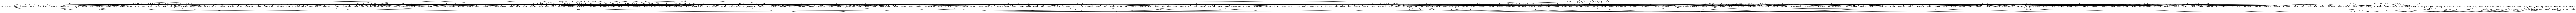

In [253]:
im = Image(G.create_png())
display(im)

In [134]:
import networkx as nx
import json
import matplotlib.pyplot as plt
import numpy as np

[autoreload of analytics failed: Traceback (most recent call last):
  File "/Users/lukastaerk/Library/Python/3.7/lib/python/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/lukastaerk/Library/Python/3.7/lib/python/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/lukastaerk/Library/Python/3.7/lib/python/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/lukastaerk/Library/Python/3.7/lib/python/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/Users/lukastaerk/Library/Python/3.7/lib/python/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/lukastaerk/Library/Python/3.7/lib/python/site-packages/IPython/extensions/autoreload.py", line 266, 

/home/luka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


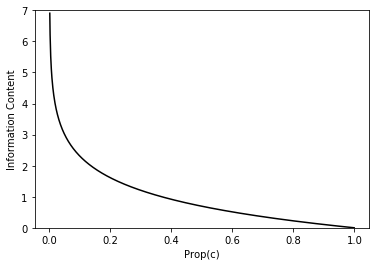

In [36]:
x = np.arange(0,1,0.001)
plt.plot(x, list(map(ic, x)), "k" )
plt.xlabel("Prop(c)")
plt.ylabel("Information Content")
plt.ylim((0,7))

In [3]:
DiGold = get_DiGraph_from_file()

In [4]:
concepts = read_concepts_from_file("data/gold_wiki_concepts.json")

In [5]:
ac1_concepts = read_concepts_from_file("data/ac1_wiki_concepts.json")

In [6]:
DiAC1 = get_AC1_Graph_from_file()

In [7]:
dac = remove_backward_edges(DiGold, "Q35120")
print(len(list(dac.edges())), len(list(DiGold.edges())), len(list(nx.edge_dfs(DiGold, "Q35120"))))

3705 3888 3848


In [254]:
from IPython.display import Image, display

def draw_graph(name, graph, concepts):
    concepts_in_graph = [n for n in concepts if n[0] in graph.nodes()]
    g = get_graphic_G(graph, concepts_in_graph)
    im = Image(g.create_png())
    display(im)
    g.write_png(name+".png")


In [256]:
from graph_tool.all import *

ModuleNotFoundError: No module named 'graph_tool'

In [255]:
#SubG = get_subgraph_from_dac(dac,"Q197")

g = load_graph("data/dbpedia/gold_DiGraph.gml","gml",)
g.is_directed()
list(g.get_vertices())

NameError: name 'load_graph' is not defined

In [11]:
#graph_draw(g)

In [9]:
def ic(prop):
    return -np.log(prop)

In [4]:
def wpath(length, freq, k=0.8):
    return 1/(1+length*np.power(k,-np.log(freq/5000000)))

In [49]:
wpath(5,11)

0.7854080377697628

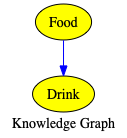

In [12]:
SubG = get_subgraph_from_dac(dac,"Q2095")
draw_graph("pic/food",SubG , concepts)

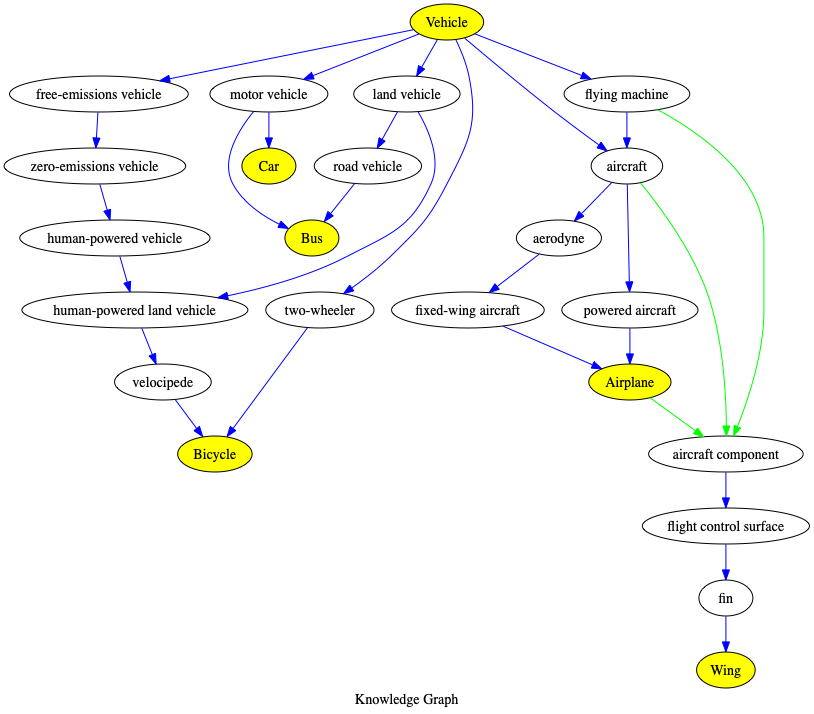

In [13]:
SubG_AC1 = get_subgraph_from(DiAC1,"Q42889", 10)
draw_graph("pic/test",SubG_AC1 , ac1_concepts)